# Classification of respondents

# Findings

In [1]:
"""

1)Data Set has 301 coloumns.

2)73 columns had missing values in which 49 Columns had 50% more missing values which are dropped for better model performance.

3)Missing values are treated With Help of Central Tendencies, which ever is suitable.

4)coloumns 'totshopping.rep' dropped from the data set as the testdata which is provided had nan values
it can be included buy getting the data or by creating the nested model as of time constaint of assignmen i am just mentioning.

5)one-hot-encoding is done on the only categorical feature 'var9'.

6)As we are using RF model and it is robust to outlier and dosent required scaling in is not done on data set.

7)sklearn's Feature Selection is used to removed reductant data and finally 111 data is selected

8)Tqdm is used to vizualise the loop timings.

9)Model is saved in pickle file.

10)model Accuracy is found to be 96% and f1-score 88% this is because dataset need further more prepration which cannot be attain now due to time constraint


'"""

"\n\n1)Data Set has 301 coloumns.\n\n2)73 columns had missing values in which 49 Columns had 50% more missing values which are dropped for better model performance.\n\n3)Missing values are treated With Help of Central Tendencies, which ever is suitable.\n\n4)coloumns 'totshopping.rep' dropped from the data set as the testdata which is provided had nan values\nit can be included buy getting the data or by creating the nested model as of time constaint of assignmen i am just mentioning.\n\n5)one-hot-encoding is done on the only categorical feature 'var9'.\n\n6)As we are using RF model and it is robust to outlier and dosent required scaling in is not done on data set.\n\n7)sklearn's Feature Selection is used to removed reductant data and finally 111 data is selected\n\n8)Tqdm is used to vizualise the loop timings.\n\n9)Model is saved in pickle file.\n\n10)model Accuracy is found to be 96% and f1-score 88% this is because dataset need further more prepration which cannot be attain now due 

# Install Dependencies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import seaborn as sns
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [3]:
#outlier function here it is not necessary as the model we using is RF and also in 1st degree analysing there is no outliers found

# def outlier(x):
#     # taking 5,25,75 percentile of column
#     q5= np.percentile(x,5)
#     q25=np.percentile(x,25)
#     q75=np.percentile(x,75)
#     dt=np.percentile(x,95)
#     #calculationg IQR range
#     IQR=q75-q25
#     #Calculating minimum threshold
#     lower_bound=q25-(1.5*IQR)
#     upper_bound=q75+(1.5*IQR)
#     #Calculating maximum threshold
#     print(q5,q25,q75,dt,min,max)
#     return x.apply(lambda y: dt if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)

In [5]:
df = pd.read_csv("D:\data science\BBI Assignment\SpendData.csv")

In [6]:
df

,Unnamed: 0,month,var8,var6,a.1,a.2,a.3,a.4,var5,b.5,b.6,b.7,b.8,b.9,b.10,b.11,b.12,b.13,b.14,b.15,b.16,b.17,b.18,b.19,b.20,b.21,b.22,pov6,b.23,b.24,b.25,b.26,b.27,b.28,c.29,c.30,var7,c.31,c.32,c.33,c.34,c.35,c.36,c.37,c.38,c.39,c.40,c.41,c.42,c.43,c.44,c.45,c.46,c.47,c.48,c.49,c.50,c.51,c.52,c.53,c.54,c.55,c.56,c.57,c.58,c.59,c.60,c.61,c.62,b.63,c.64,c.65,c.66,c.67,c.68,c.69,c.70,c.71,c.72,c.73,c.74,c.75,c.76,c.77,c.78,c.79,c.80,c.81,c.82,c.83,c.84,c.85,c.86,c.87,c.88,c.89,c.90,c.91,c.92,c.93,d.94,e.95,e.96,e.97,e.98,e.99,e.100,e.101,f.102,f.103,f.104,f.105,f.106,f.107,f.108,f.109,f.110,f.111,f.112,f.113,f.114,f.115,f.116,f.117,f.118,f.119,f.120,f.121,f.122,f.123,a.124,var3,var4,c.125,c.126,c.127,pp.128,pp.129,pp.130,pp.131,pp.132,pp.133,pp.134,c.135,c.136,c.137,c.138,c.139,c.140,c.141,c.142,c.143,c.144,c.145,c.146,c.147,c.148,t7.149,t7.150,t7.151,t7.152,t7.153,t7.154,t7.155,t7.156,t7.157,t7.158,c.159,c.160,c.161,c.162,c.163,c.164,c.165,c.166,c.167,c.168,c.169,c.170,c.171,c.172,t7.173,t7.174,t7.175,t7.176,t7.177,t7.178,t7.179,t7.180,t7.181,t7.182,a.183,a.184,a.185,a.186,var2,totshopping.rep,var1,c.187,f.188,c.189,c.190,var0,var9,year,respondent.id,b.191,b.192,b.193,b.194,b.195,c.196,c.197,c.198,c.199,c.200,c.201,c.202,c.203,c.204,c.205,c.206,c.207,c.208,c.209,c.210,c.211,c.212,c.213,c.214,c.215,c.216,c.217,c.218,c.219,c.220,c.221,c.222,c.223,c.224,c.225,c.226,c.227,c.228,c.229,c.230,c.231,c.232,c.233,c.234,c.235,c.236,c.237,c.238,c.239,c.240,c.241,c.242,c.243,c.244,c.245,c.246,c.247,c.248,c.249,c.250,c.251,c.252,c.253,c.254,c.255,c.256,c.257,c.258,c.259,c.260,c.261,c.262,c.263,c.264,c.265,c.266,c.267,c.268,c.269,c.270,c.271,c.272,c.273,c.274,c.275,c.276,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284,t.158
0,1,1,2.0,NaN,1,5,1,57,34,1,NaN,1,1.0,2,NaN,NaN,2,NaN,NaN,6,6,6.0,6.0,7,0.0,0.0,14,1,0,0,0,0,0,0,1,1,1,1.0,1,1,0,0,NaN,NaN,2,679.04,0.0,0.0,0,0.0,0.0,0,0,679.04,2.0,0,0.0,0,400.0,0,0.0,0,0.0,400.0,50.0,50.0,2.0,NaN,0.0,2,0,0.0,0.0,NaN,0,0.0,0,0.0,0,0.0,0,0.0,0.0,150.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2,6,2,3,2,2,2,2,2.0,1,2,3,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.04,6004575.00,2.0,150.0,2,0.0,482.11,0.0,0.0,60.43,123.96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,0.0,0.0,0.0,75.0,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,1,113.17,NaN,NaN,26.70,75.0,101.70,1,2,3,1.0,15.0,1,Mono,2016,2016_1,1,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,1,1,0,0,1,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,5.0,NaN
1,2,1,2.0,NaN,1,4,1,57,34,2,3.0,1,1.0,2,NaN,NaN,2,NaN,NaN,50,50,50.0,50.0,12,0.0,0.0,31,1,14,0,0,0,0,0,2,2,2,NaN,2,0,0,0,NaN,NaN,2,NaN,0.0,0.0,0,0.0,0.0,0,0,0.00,NaN,0,100.0,0,30.0,0,0.0,0,0.0,130.0,100.0,100.0,1.0,NaN,0.0,2,0,0.0,0.0,NaN,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,5,2,2,2,3,3,2,2.0,2,1,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.04,6004575.00,NaN,0.0,2,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,26.70,0.0,26.70,1,2,1,7.0,NaN,14,Mono,2016,2016_2,0,1,0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN,NaN
2,3,1,2.0,NaN,1,5,1,57,42,2,1.0,1,1.0,1,93.0,1.0,1,93.0,60.0,6,6,6.0,6.0,7,0.0,0.0,45,1,31,0,0,0,0,0,2,2,3,NaN,2,0,0,0,NaN,NaN,2,NaN,0.0,0.0,0,0.0,0.0,0,0,0.00,NaN,0,0.0,0,1000.0,0,0.0,0,0.0,1000.0,250.0,250.0,1.0,NaN,0.0,2,0,0.0,0.0,NaN,0,0.0,0,0.0,0,0.0,0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,7,4,4,4,4,4,4,NaN,1,1,2,13.0,8.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

# 1) EDA / Data Cleaning

In [7]:
data=df.copy()
data.describe()

,Unnamed: 0,month,var8,var6,a.1,a.2,a.3,a.4,var5,b.5,b.6,b.7,b.8,b.9,b.10,b.11,b.12,b.13,b.14,b.15,b.16,b.17,b.18,b.19,b.20,b.21,b.22,pov6,b.23,b.24,b.25,b.26,b.27,b.28,c.29,c.30,var7,c.31,c.32,c.33,c.34,c.35,c.36,c.37,c.38,c.39,c.40,c.41,c.42,c.43,c.44,c.45,c.46,c.47,c.48,c.49,c.50,c.51,c.52,c.53,c.54,c.55,c.56,c.57,c.58,c.59,c.60,c.61,c.62,b.63,c.64,c.65,c.66,c.67,c.68,c.69,c.70,c.71,c.72,c.73,c.74,c.75,c.76,c.77,c.78,c.79,c.80,c.81,c.82,c.83,c.84,c.85,c.86,c.87,c.88,c.89,c.90,c.91,c.92,c.93,d.94,e.95,e.96,e.97,e.98,e.99,e.100,e.101,f.102,f.103,f.104,f.105,f.106,f.107,f.108,f.109,f.110,f.111,f.112,f.113,f.114,f.115,f.116,f.117,f.118,f.119,f.120,f.121,f.122,f.123,a.124,var3,var4,c.125,c.126,c.127,pp.128,pp.129,pp.130,pp.131,pp.132,pp.133,pp.134,c.135,c.136,c.137,c.138,c.139,c.140,c.141,c.142,c.143,c.144,c.145,c.146,c.147,c.148,t7.149,t7.150,t7.151,t7.152,t7.153,t7.154,t7.155,t7.156,t7.157,t7.158,c.159,c.160,c.161,c.162,c.163,c.164,c.165,c.166,c.167,c.168,c.169,c.170,c.171,c.172,t7.173,t7.174,t7.175,t7.176,t7.177,t7.178,t7.179,t7.180,t7.181,t7.182,a.183,a.184,a.185,a.186,var2,totshopping.rep,var1,c.187,f.188,c.189,c.190,var0,year,b.191,b.192,b.193,b.194,b.195,c.196,c.197,c.198,c.199,c.200,c.201,c.202,c.203,c.204,c.205,c.206,c.207,c.208,c.209,c.210,c.211,c.212,c.213,c.214,c.215,c.216,c.217,c.218,c.219,c.220,c.221,c.222,c.223,c.224,c.225,c.226,c.227,c.228,c.229,c.230,c.231,c.232,c.233,c.234,c.235,c.236,c.237,c.238,c.239,c.240,c.241,c.242,c.243,c.244,c.245,c.246,c.247,c.248,c.249,c.250,c.251,c.252,c.253,c.254,c.255,c.256,c.257,c.258,c.259,c.260,c.261,c.262,c.263,c.264,c.265,c.266,c.267,c.268,c.269,c.270,c.271,c.272,c.273,c.274,c.275,c.276,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284,t.158
count,18379.000000,18379.000000,14370.000000,1899.00000,18379.0,18379.000000,18379.0,18379.000000,18379.000000,18379.000000,10300.000000,18379.000000,16606.000000,18379.000000,2372.000000,2372.00000,18379.000000,6696.000000,6459.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,4145.000000,3281.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,3154.000000,18379.000000,18379.000000,18379.000000,18379.000000,231.000000,7.000000,18379.000000,13020.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,13904.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,10395.000000,1609.000000,18379.000000,18379.000000,18379.0,18379.000000,18379.000000,943.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18301.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,15289.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.00000,18379.000000,14138.000000,18379.000000,18379.000000,18379.000000,2220.000000,2219.000000,2001.000000,985.000000,1837.000000,670.000000,929.000000,2554.000000,3396.000000,944.000000,501.000000,634.000000,394.000000,435.000000,558.000000,337.000000,251.000000,427.000000,505.000000,18379.000000,1.837900e+04,15289.000000,18302.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18312.000000,18379.000000,18379.000000,18379.000000,18379.000000,18375.000000,18376.000000,18379.000000,18379.000000,18379.000000,18378.000000,18379.000000,18378.000000,18378.000000,18312.000000,18379.000000,18379.000000,18379.000000,18375.000000,18377.000000,18379.000000,18379.000000,18376.000000,18303.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,183

# 1.1)Visualizing missing values

In [8]:
missing_values = data.isnull().sum() / len(data)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values = pd.DataFrame(missing_values)

In [9]:
missing_values.columns = ['count']
missing_values.index.names = ['Name']
missing_values['Name'] = missing_values.index

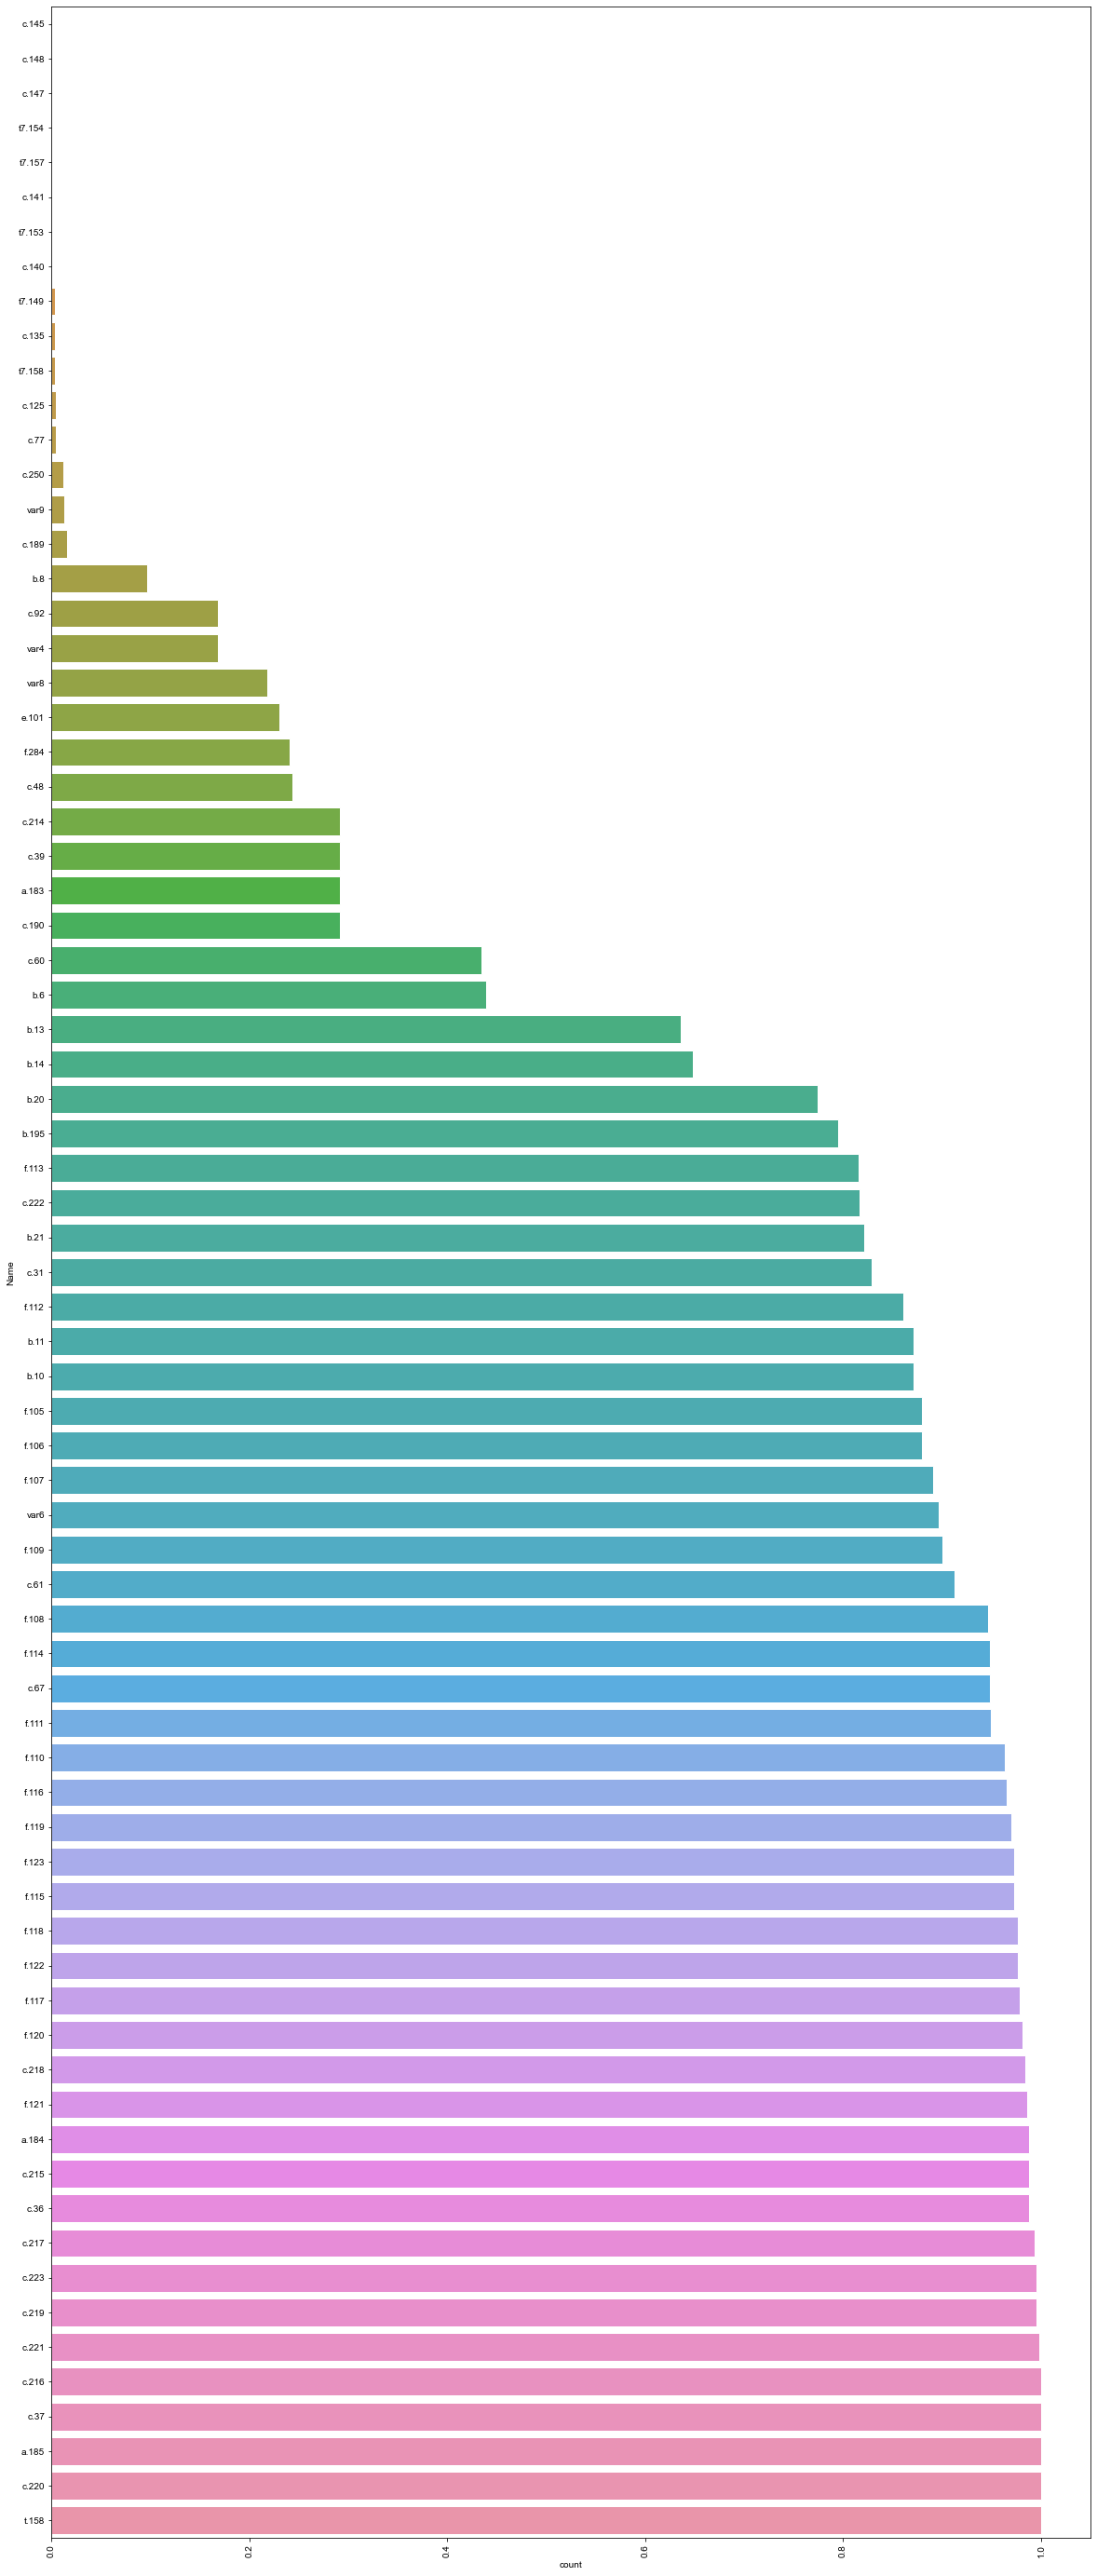

In [10]:
fig,ax = plt.subplots(figsize=(20,50))
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'count', y = 'Name', data= missing_values,ax=ax)
plt.xticks(rotation = 90)
plt.show()

In [11]:
y_data = data["pov6"]
x_data = data.drop(['pov6','respondent.id','Unnamed: 0','year','totshopping.rep'],axis=1)

## Splitting of data before data preprocessing to avoid data leakage

In [12]:
#splitting data set for training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=42)

# 2) Feature Engineering

In [13]:
data_missing = x_train[x_data.columns[x_train.isnull().any()]]

In [14]:
data_missing

,var8,var6,b.6,b.8,b.10,b.11,b.13,b.14,b.20,b.21,c.31,c.36,c.37,c.39,c.48,c.60,c.61,c.67,c.77,c.92,e.101,f.105,f.106,f.107,f.108,f.109,f.110,f.111,f.112,f.113,f.114,f.115,f.116,f.117,f.118,f.119,f.120,f.121,f.122,f.123,var4,c.125,c.135,c.140,c.141,c.145,c.147,c.148,t7.149,t7.153,t7.154,t7.157,t7.158,a.183,a.184,a.185,c.189,c.190,var9,b.195,c.214,c.215,c.216,c.217,c.218,c.219,c.220,c.221,c.222,c.223,c.250,f.284,t.158
1310,3.0,NaN,4.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,900.00,3.0,3.0,NaN,NaN,208.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,3.0,208.0,0.0,33.33,0.0,0.0,0.0,0.0,0.0,33.33,0.0,36.0,69.33,200.09,NaN,NaN,1.0,900.0,Mono,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,NaN
16156,NaN,NaN,2.0,1.0,NaN,NaN,121.0,2.0,NaN,NaN,NaN,NaN,NaN,450.00,1.0,1.0,1.0,NaN,50.0,1.0,NaN,14.0,9.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,50.0,0.0,20.00,30.0,0.0,0.0,0.0,0.0,20.00,30.0,0.0,50.00,91.65,NaN,NaN,1.0,716.0,Multi,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,NaN
10301,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350.00,1.0,2.0,NaN,2.0,170.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,170.0,60.0,30.00,70.0,0.0,0.0,0.0,60.0,30.00,70.0,0.0,170.00,251.24,NaN,NaN,1.0,24.0,Mono,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN
8823,1.0,NaN,NaN,1.0,NaN,NaN,200.0,3.0,NaN,NaN,NaN,NaN,NaN,588.82,2.0,2.0,NaN,NaN,350.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,350.0,125.0,0.00,0.0,0.0,0.0,0.0,125.0,0.00,0.0,0.0,175.00,196.27,NaN,NaN,1.0,56.0,Multi,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4.0,NaN
10428,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.00,2.0,2.0,NaN,NaN,180.0,2.0,3.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,180.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,90.00,142.27,NaN,NaN,1.0,1.0,Mono,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,0.0,NaN,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,NaN,NaN,NaN,3.0,NaN,Mono,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,0.0,2.0,NaN
11964,3.0,NaN,NaN,1.0,NaN,NaN,102.0,4.0,NaN,NaN,NaN,NaN,NaN,200.00,2.0,2.0,NaN,NaN,800.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,800.0,250.0,0.00,25.0,0.0,0.0,0.0,250.0,0.00,25.0,0.0,400.00,102.08,NaN,NaN,1.0,885.0,Multi,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN
5390,3.0,NaN,4.0,1.0,NaN,NaN,12.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,NaN,NaN,NaN,7.0,NaN,Multi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,0.0,NaN,NaN
860,1.0,NaN,4.0,1.0,12.0,28.0,200.0,6.0,0.0,0.0,NaN,NaN,NaN,95.00,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,95.14,NaN,NaN,1.0,889.0,Multi,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN


In [15]:
x_train = x_train.dropna(axis=1)

In [16]:
data_missing.isnull().sum()

var8      3163
var6     13192
b.6       6478
b.8       1401
b.10     12788
         ...  
c.222    12010
c.223    14632
c.250      172
f.284     3527
t.158    14703
Length: 73, dtype: int64

In [17]:
new_data = data_missing.dropna(thresh=data_missing.shape[0]*0.5,how='all',axis=1) #dropping missing values more than 50%

In [18]:
list((new_data.select_dtypes('object').columns)) #finding out list of object datatypes

['var9']

In [19]:
new_data["var9"].fillna(new_data["var9"].mode(),inplace=True)

D:\Programfiles\anaconda3\envs\tf_gpu\lib\site-packages\pandas\core\series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [20]:
new_data.fillna(new_data.median(),inplace=True)

In [21]:
x_train = pd.concat([x_train,new_data],axis=1) #joining non missing data with cleaned data

In [22]:
x_train.describe()

,month,a.1,a.2,a.3,a.4,var5,b.5,b.7,b.9,b.12,b.15,b.16,b.17,b.18,b.19,b.22,b.23,b.24,b.25,b.26,b.27,b.28,c.29,c.30,var7,c.32,c.33,c.34,c.35,c.38,c.40,c.41,c.42,c.43,c.44,c.45,c.46,c.47,c.49,c.50,c.51,c.52,c.53,c.54,c.55,c.56,c.57,c.58,c.59,c.62,b.63,c.64,c.65,c.66,c.68,c.69,c.70,c.71,c.72,c.73,c.74,c.75,c.76,c.78,c.79,c.80,c.81,c.82,c.83,c.84,c.85,c.86,c.87,c.88,c.89,c.90,c.91,c.93,d.94,e.95,e.96,e.97,e.98,e.99,e.100,f.102,f.103,f.104,a.124,var3,c.126,c.127,pp.128,pp.129,pp.130,pp.131,pp.132,pp.133,pp.134,c.136,c.137,c.138,c.139,c.142,c.143,c.144,c.146,t7.150,t7.151,t7.152,t7.155,t7.156,c.159,c.160,c.161,c.162,c.163,c.164,c.165,c.166,c.167,c.168,c.169,c.170,c.171,c.172,t7.173,t7.174,t7.175,t7.176,t7.177,t7.178,t7.179,t7.180,t7.181,t7.182,a.186,var2,var1,c.187,f.188,var0,b.191,b.192,b.193,b.194,c.196,c.197,c.198,c.199,c.200,c.201,c.202,c.203,c.204,c.205,c.206,c.207,c.208,c.209,c.210,c.211,c.212,c.213,c.224,c.225,c.226,c.227,c.228,c.229,c.230,c.231,c.232,c.233,c.234,c.235,c.236,c.237,c.238,c.239,c.240,c.241,c.242,c.243,c.244,c.245,c.246,c.247,c.248,c.249,c.251,c.252,c.253,c.254,c.255,c.256,c.257,c.258,c.259,c.260,c.261,c.262,c.263,c.264,c.265,c.266,c.267,c.268,c.269,c.270,c.271,c.272,c.273,c.274,c.275,c.276,c.277,c.278,c.279,c.280,c.281,c.282,c.283,var8,b.6,b.8,c.39,c.48,c.60,c.77,c.92,e.101,var4,c.125,c.135,c.140,c.141,c.145,c.147,c.148,t7.149,t7.153,t7.154,t7.157,t7.158,a.183,c.189,c.190,c.214,c.250,f.284
count,14703.000000,14703.0,14703.000000,14703.0,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.00000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.0,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,1.470300e+04,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.00000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.00000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.00000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.0000

In [23]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14703 entries, 1310 to 15795
Columns: 252 entries, month to f.284
dtypes: float64(89), int64(162), object(1)
memory usage: 28.4+ MB


In [24]:
dummies = pd.get_dummies(x_train["var9"],columns="categorical_fields",prefix="var9",drop_first=True)#one-hot encoding on object data-types

In [25]:
x_train = pd.concat([x_train,dummies],axis=1)

In [26]:
x_train=x_train.drop(["var9"],axis=1)

In [27]:
x_train.describe()

,month,a.1,a.2,a.3,a.4,var5,b.5,b.7,b.9,b.12,b.15,b.16,b.17,b.18,b.19,b.22,b.23,b.24,b.25,b.26,b.27,b.28,c.29,c.30,var7,c.32,c.33,c.34,c.35,c.38,c.40,c.41,c.42,c.43,c.44,c.45,c.46,c.47,c.49,c.50,c.51,c.52,c.53,c.54,c.55,c.56,c.57,c.58,c.59,c.62,b.63,c.64,c.65,c.66,c.68,c.69,c.70,c.71,c.72,c.73,c.74,c.75,c.76,c.78,c.79,c.80,c.81,c.82,c.83,c.84,c.85,c.86,c.87,c.88,c.89,c.90,c.91,c.93,d.94,e.95,e.96,e.97,e.98,e.99,e.100,f.102,f.103,f.104,a.124,var3,c.126,c.127,pp.128,pp.129,pp.130,pp.131,pp.132,pp.133,pp.134,c.136,c.137,c.138,c.139,c.142,c.143,c.144,c.146,t7.150,t7.151,t7.152,t7.155,t7.156,c.159,c.160,c.161,c.162,c.163,c.164,c.165,c.166,c.167,c.168,c.169,c.170,c.171,c.172,t7.173,t7.174,t7.175,t7.176,t7.177,t7.178,t7.179,t7.180,t7.181,t7.182,a.186,var2,var1,c.187,f.188,var0,b.191,b.192,b.193,b.194,c.196,c.197,c.198,c.199,c.200,c.201,c.202,c.203,c.204,c.205,c.206,c.207,c.208,c.209,c.210,c.211,c.212,c.213,c.224,c.225,c.226,c.227,c.228,c.229,c.230,c.231,c.232,c.233,c.234,c.235,c.236,c.237,c.238,c.239,c.240,c.241,c.242,c.243,c.244,c.245,c.246,c.247,c.248,c.249,c.251,c.252,c.253,c.254,c.255,c.256,c.257,c.258,c.259,c.260,c.261,c.262,c.263,c.264,c.265,c.266,c.267,c.268,c.269,c.270,c.271,c.272,c.273,c.274,c.275,c.276,c.277,c.278,c.279,c.280,c.281,c.282,c.283,var8,b.6,b.8,c.39,c.48,c.60,c.77,c.92,e.101,var4,c.125,c.135,c.140,c.141,c.145,c.147,c.148,t7.149,t7.153,t7.154,t7.157,t7.158,a.183,c.189,c.190,c.214,c.250,f.284,var9_Multi
count,14703.000000,14703.0,14703.000000,14703.0,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.00000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.0,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,1.470300e+04,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.00000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.00000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.00000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000,14703.000000

## Removal of reduntant data

In [29]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100),threshold=0.001)
sel.fit(x_train, y_train)
sel.get_support()
selected_feat= x_train.columns[(sel.get_support())]
len(selected_feat)

111

In [30]:
list(selected_feat)

['month',
 'a.2',
 'a.4',
 'var5',
 'b.5',
 'b.7',
 'b.9',
 'b.12',
 'b.15',
 'b.16',
 'b.17',
 'b.18',
 'b.19',
 'b.22',
 'b.23',
 'b.24',
 'c.29',
 'c.30',
 'var7',
 'c.33',
 'c.38',
 'c.47',
 'c.50',
 'c.52',
 'c.57',
 'c.58',
 'c.59',
 'c.65',
 'c.66',
 'c.69',
 'c.73',
 'c.75',
 'c.76',
 'c.78',
 'c.81',
 'c.82',
 'c.83',
 'c.84',
 'c.93',
 'd.94',
 'e.95',
 'e.96',
 'e.97',
 'e.98',
 'e.99',
 'e.100',
 'f.102',
 'f.103',
 'f.104',
 'a.124',
 'var3',
 'pp.128',
 'pp.130',
 'c.138',
 'c.139',
 'c.146',
 't7.152',
 'c.164',
 't7.173',
 'a.186',
 'var2',
 'var1',
 'c.187',
 'f.188',
 'var0',
 'b.191',
 'b.192',
 'b.193',
 'b.194',
 'c.201',
 'c.205',
 'c.225',
 'c.226',
 'c.231',
 'c.234',
 'c.235',
 'c.236',
 'c.237',
 'c.245',
 'c.246',
 'c.255',
 'c.259',
 'c.266',
 'c.267',
 'c.270',
 'c.282',
 'var8',
 'b.6',
 'b.8',
 'c.39',
 'c.48',
 'c.60',
 'c.77',
 'c.92',
 'e.101',
 'var4',
 'c.125',
 'c.135',
 'c.140',
 'c.141',
 't7.149',
 't7.153',
 't7.154',
 't7.157',
 't7.158',
 'a.1

In [31]:
x_train=x_train[selected_feat]

In [ ]:
sns.heatmap(x_train.corr)

In [30]:
#On pca on dataset accuracy of the model found to be reduced and also there is no stron correlation between dependent and independents pca not carried out 

# scaler = MinMaxScaler()
# data_rescaled = scaler.fit_transform(x_train)


# pca = PCA(n_components = 0.95)
# pca.fit(data_rescaled)
# reduced = pca.transform(data_rescaled)

# model = RandomForestClassifier()


# param_grid = { 
#     'n_estimators': [10,50,100,500,1000,2000,3000],
#     'max_features': ["auto", None, "sqrt", "log2", 0.9, 0.2,1],
#     'min_samples_leaf' : [1,2,3,4,5,6,7,8,9,10],
#     'criterion' :['gini', 'entropy']
# }


# grid_search = GridSearchCV(estimator=model,param_grid=param_grid,cv=5, n_jobs = -1, verbose = 2)
# grid_search.fit(X_data,y_data)
# print (grid_search.best_params)

# 3)Predictive Modeling

In [31]:
model = RandomForestClassifier(n_estimators = 100 ,oob_score=True,random_state=100)
model.fit(x_train,y_train)

RandomForestClassifier(oob_score=True, random_state=100)

## Visualizing the impotance of data on prediction Dependent variable

month         0.007869
a.2           0.007350
a.4           0.005603
var5          0.005618
b.5           0.004407
                ...   
c.189         0.006879
c.190         0.004842
c.214         0.002836
f.284         0.003867
var9_Multi    0.007601
Length: 111, dtype: float64


<AxesSubplot:>

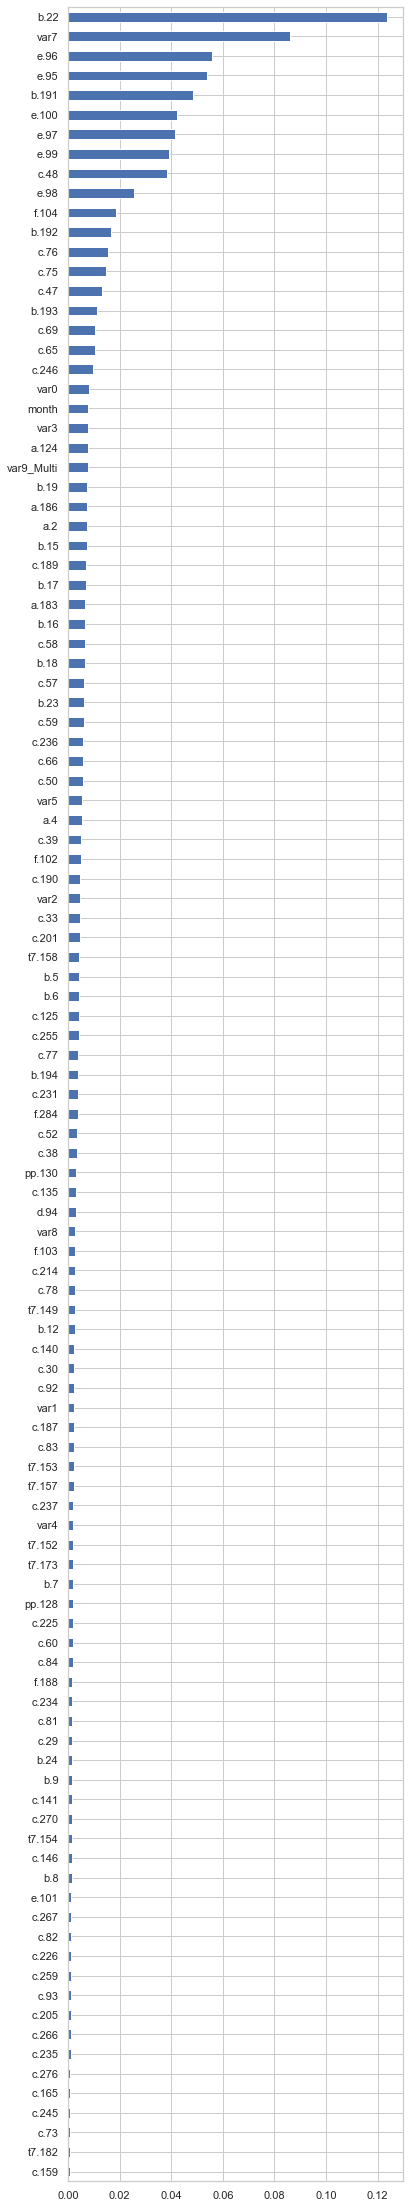

In [32]:
feature_importances = pd.Series(model.feature_importances_, index=x_train.columns)
print(feature_importances)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind='barh', figsize=(6,40))

In [33]:
model.oob_score_

0.9542270284975856

In [34]:
from tqdm import tqdm_notebook as tqdm

# Hyper parameter tuning for finding suitable parameters

D:\Programfiles\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


D:\Programfiles\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Programfiles\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


variables 10
OOB 0.9387199891178671
variables 50
OOB 0.9518465619261375
variables 100
OOB 0.9542270284975856
variables 500
OOB 0.9565394817384207
variables 1000
OOB 0.9559953750935183
variables 2000
OOB 0.9560633884241311
variables 3000
OOB 0.956131401754744



<AxesSubplot:>

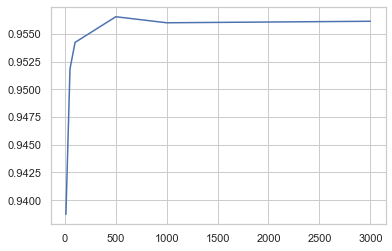

In [35]:
%timeit
result=[]
estimators=[10,50,100,500,1000,2000,3000]
for variables in tqdm(estimators):
    model = RandomForestClassifier(n_estimators=variables,oob_score=True,random_state=100)
    model.fit(x_train,y_train)
    print("variables",variables)
    oob = model.oob_score_
    print("OOB",model.oob_score_)
    result.append(oob)
pd.Series(result, estimators).plot()


D:\Programfiles\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


features_value : auto
oob : 0.9555192817792287
features_value : None
oob : 0.9600081615996735
features_value : sqrt
oob : 0.9555192817792287
features_value : log2
oob : 0.9519825885873632
features_value : 0.9
oob : 0.9604162415833504
features_value : 0.2
oob : 0.9586478949874175
features_value : 1
oob : 0.9318506427259743



<AxesSubplot:>

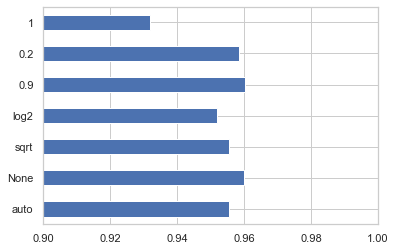

In [42]:
result=[]
features=["auto", None, "sqrt", "log2", 0.9, 0.2,1]
for variables in tqdm(features):
    model = RandomForestClassifier(n_estimators=500,max_features=variables,random_state=100,oob_score=True)
    model.fit(x_train,y_train)
    print("features_value :",variables)
    oob=model.oob_score_
    print("oob :",oob)
    result.append(oob)
    
pd.Series(result,features).plot(kind='barh', xlim=(.90, 1))

D:\Programfiles\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


features_value : 1
oob : 0.9604162415833504
features_value : 2
oob : 0.9600081615996735
features_value : 3
oob : 0.9606882949058015
features_value : 4
oob : 0.9600081615996735
features_value : 5
oob : 0.9602122015915119
features_value : 6
oob : 0.9591920016323199
features_value : 7
oob : 0.9591920016323199
features_value : 8
oob : 0.9589879616404815
features_value : 9
oob : 0.9588519349792559
features_value : 10
oob : 0.9587159083180303



<AxesSubplot:>

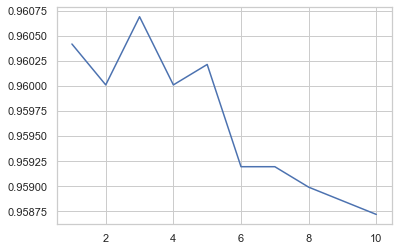

In [43]:
result=[]
features=[1,2,3,4,5,6,7,8,9,10]
for variables in tqdm(features):
    model = RandomForestClassifier(n_estimators=500,max_features=0.9,random_state=100,oob_score=True,min_samples_leaf=variables)
    model.fit(x_train,y_train)
    print("features_value :",variables)
    oob=model.oob_score_
    print("oob :",oob)
    result.append(oob)
    
pd.Series(result,features).plot()

In [36]:
model = RandomForestClassifier(n_estimators=500, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=100, 
                              max_features=0.9, 
                              min_samples_leaf=3)
model.fit(x_train,y_train)
OOB = model.oob_score_
print('OOB: ', OOB)

OOB:  0.960552268244576


# similar Data Processing stops to use the test data for model prediction

In [37]:
x_test

,month,var8,var6,a.1,a.2,a.3,a.4,var5,b.5,b.6,b.7,b.8,b.9,b.10,b.11,b.12,b.13,b.14,b.15,b.16,b.17,b.18,b.19,b.20,b.21,b.22,b.23,b.24,b.25,b.26,b.27,b.28,c.29,c.30,var7,c.31,c.32,c.33,c.34,c.35,c.36,c.37,c.38,c.39,c.40,c.41,c.42,c.43,c.44,c.45,c.46,c.47,c.48,c.49,c.50,c.51,c.52,c.53,c.54,c.55,c.56,c.57,c.58,c.59,c.60,c.61,c.62,b.63,c.64,c.65,c.66,c.67,c.68,c.69,c.70,c.71,c.72,c.73,c.74,c.75,c.76,c.77,c.78,c.79,c.80,c.81,c.82,c.83,c.84,c.85,c.86,c.87,c.88,c.89,c.90,c.91,c.92,c.93,d.94,e.95,e.96,e.97,e.98,e.99,e.100,e.101,f.102,f.103,f.104,f.105,f.106,f.107,f.108,f.109,f.110,f.111,f.112,f.113,f.114,f.115,f.116,f.117,f.118,f.119,f.120,f.121,f.122,f.123,a.124,var3,var4,c.125,c.126,c.127,pp.128,pp.129,pp.130,pp.131,pp.132,pp.133,pp.134,c.135,c.136,c.137,c.138,c.139,c.140,c.141,c.142,c.143,c.144,c.145,c.146,c.147,c.148,t7.149,t7.150,t7.151,t7.152,t7.153,t7.154,t7.155,t7.156,t7.157,t7.158,c.159,c.160,c.161,c.162,c.163,c.164,c.165,c.166,c.167,c.168,c.169,c.170,c.171,c.172,t7.173,t7.174,t7.175,t7.176,t7.177,t7.178,t7.179,t7.180,t7.181,t7.182,a.183,a.184,a.185,a.186,var2,var1,c.187,f.188,c.189,c.190,var0,var9,b.191,b.192,b.193,b.194,b.195,c.196,c.197,c.198,c.199,c.200,c.201,c.202,c.203,c.204,c.205,c.206,c.207,c.208,c.209,c.210,c.211,c.212,c.213,c.214,c.215,c.216,c.217,c.218,c.219,c.220,c.221,c.222,c.223,c.224,c.225,c.226,c.227,c.228,c.229,c.230,c.231,c.232,c.233,c.234,c.235,c.236,c.237,c.238,c.239,c.240,c.241,c.242,c.243,c.244,c.245,c.246,c.247,c.248,c.249,c.250,c.251,c.252,c.253,c.254,c.255,c.256,c.257,c.258,c.259,c.260,c.261,c.262,c.263,c.264,c.265,c.266,c.267,c.268,c.269,c.270,c.271,c.272,c.273,c.274,c.275,c.276,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284,t.158
10163,7,3.0,NaN,1,7,1,16,17,2,1.0,1,1.0,2,NaN,NaN,1,94.0,3.0,2,2,2.0,2.0,3,NaN,NaN,45,0,0,0,0,0,0,2,2,3,NaN,2,1,0,0,NaN,NaN,1,350.0,0.0,0.0,0,0.0,0.0,0,0,350.0,1.0,0,0.0,0,350.0,0,0.0,0,0.0,350.0,50.0,50.0,NaN,1.0,0.0,2,0,50.0,50.0,NaN,0,0.0,0,0.0,0,0.0,0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,5,4,4,4,4,4,4,NaN,2,2,4,12.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.19,3.420172e+06,1.0,NaN,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,NaN,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,1,102.08,NaN,NaN,30.93,0.00,1,1,1,1.0,781.0,1,Multi,0,1,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
6667,5,1.0,NaN,1,6,1,128,18,1,NaN,1,1.0,2,NaN,NaN,1,200.0,5.0,4,4,4.0,4.0,5,NaN,NaN,13,14,0,0,0,0,0,2,2,2,NaN,2,1,0,0,NaN,NaN,1,800.0,0.0,0.0,0,0.0,0.0,0,0,800.0,2.0,0,150.0,0,500.0,0,0.0,0,0.0,650.0,100.0,100.0,2.0,NaN,0.0,2,0,0.0,0.0,NaN,0,0.0,0,0.0,0,0.0,0,0.0,0.0,1200.0,400.0,0.0,0.0,200.0,300.0,150.0,150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1,7,2,2,1,3,1,1,2.0,1,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.35,1.593839e+06,2.0,1200.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.00,0.0,0.0,100.0,150.0,75.0,75.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.00,0.0,0.0,250.0,75.0,75.00,0.0,0.0,0.0,600.00,1,2,2,1,1,1,1,2,2,2,2,2,2,2,1,2,2,1,1,1,2,2,2,1,244.64,NaN,NaN,43.34,600.00,1,2,1,1.0,32.0,2,Multi,1,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,NaN,NaN
7931,6,1.0,NaN,1,8,1,65,27,2,2.0,1,1.0,2,NaN,NaN,2,NaN,NaN,5,4,5.0,4.0,6,NaN,NaN,31,0,0,0,0,0,0,2,2,2,NaN,2,0,0,0,NaN,NaN,2,NaN,0.0,0.0,0,0.0,0.0,0,0,0.0,1.0,0,60.0,0,120.0,0,10.0,0,0.0,190.0,20.0,20.0,2.0,NaN,0.0,2,0,0.0,0.0,1.0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,150.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2,6,2,2,1,2,2,2,2.0,2,2,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.74,1.048633e+07,4.0,150.0,2,0.0,0.0

In [38]:
data_missing_x_test = x_test[x_test.columns[x_test.isnull().any()]]

data_missing_x_test

x_test = x_test.dropna(axis=1)

data_missing_x_test.isnull().sum()

var8      846
var6     3288
b.6      1601
b.8       372
b.10     3219
         ... 
c.222    3002
c.223    3660
c.250      49
f.284     891
t.158    3676
Length: 67, dtype: int64

In [39]:
new_x_data = data_missing_x_test.dropna(thresh=data_missing_x_test.shape[0]*0.5,how='all',axis=1)

In [40]:
list((new_x_data.select_dtypes('object').columns))

['var9']

In [41]:
new_x_data["var9"].fillna(new_x_data["var9"].mode(),inplace=True)

D:\Programfiles\anaconda3\envs\tf_gpu\lib\site-packages\pandas\core\series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [42]:
new_x_data.fillna(new_x_data.median(),inplace=True)

In [43]:
x_test = pd.concat([x_test,new_x_data],axis=1)

In [44]:
dummies = pd.get_dummies(x_test["var9"],columns="categorical_fields",prefix="var9",drop_first=True)

x_test = pd.concat([x_test,dummies],axis=1)

x_test=x_test.drop(["var9"],axis=1)

In [45]:
x_test=x_test[selected_feat]

In [46]:
x_test

,month,a.2,a.4,var5,b.5,b.7,b.9,b.12,b.15,b.16,b.17,b.18,b.19,b.22,b.23,b.24,c.29,c.30,var7,c.33,c.38,c.47,c.50,c.52,c.57,c.58,c.59,c.65,c.66,c.69,c.73,c.75,c.76,c.78,c.81,c.82,c.83,c.84,c.93,d.94,e.95,e.96,e.97,e.98,e.99,e.100,f.102,f.103,f.104,a.124,var3,pp.128,pp.130,c.146,t7.152,c.159,c.165,t7.173,t7.182,a.186,var2,var1,c.187,f.188,var0,b.191,b.192,b.193,b.194,c.201,c.205,c.225,c.226,c.231,c.234,c.235,c.236,c.237,c.245,c.246,c.255,c.259,c.266,c.267,c.270,c.276,var8,b.6,b.8,c.39,c.48,c.60,c.77,c.92,e.101,var4,c.125,c.135,c.140,c.141,t7.149,t7.153,t7.154,t7.157,t7.158,a.183,c.189,c.190,c.214,f.284,var9_Multi
10163,7,7,16,17,2,1,2,1,2,2,2.0,2.0,3,45,0,0,2,2,3,1,1,350.0,0.0,350.0,350.0,50.0,50.0,50.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,5,4,4,4,4,4,4,2,2,4,4.19,3.420172e+06,0.0,0.0,0.0,0.0,1,2,1,1,30.93,0.00,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,1.0,1.0,350.0,1.0,2.0,250.0,1.0,2.0,1.0,250.0,12.50,0.0,0.00,12.50,0.0,0.00,0.0,150.00,102.08,1.0,781.0,2.0,3.0,1
6667,5,6,128,18,1,1,2,1,4,4,4.0,4.0,5,13,14,0,2,2,2,1,1,800.0,150.0,500.0,650.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,400.0,200.0,300.0,150.0,150.0,1,7,2,2,1,3,1,1,1,2,2,4.35,1.593839e+06,0.0,0.0,0.0,250.0,1,1,1,1,43.34,600.00,1,2,1,2,1,0,0,0,0,0,1,1,1,1,0,1,0,0,1,0,0,0,1,1,0,1.0,2.0,1.0,800.0,2.0,2.0,1200.0,2.0,2.0,2.0,1200.0,200.00,75.0,75.00,200.00,75.0,75.00,0.0,600.00,244.64,1.0,32.0,4.0,3.0,1
7931,6,8,65,27,2,1,2,2,5,4,5.0,4.0,6,31,0,0,2,2,2,0,2,0.0,60.0,120.0,190.0,20.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,2,6,2,2,1,2,2,2,2,2,9,2.74,1.048633e+07,0.0,0.0,0.0,0.0,2,1,2,1,65.70,37.50,1,2,1,14,1,0,0,0,1,0,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1.0,2.0,1.0,600.0,1.0,2.0,150.0,4.0,2.0,4.0,150.0,0.00,0.0,37.50,0.00,0.0,37.50,0.0,37.50,171.38,7.0,81.0,3.0,3.0,0
2748,2,8,7,48,2,2,1,1,2,2,2.0,2.0,3,14,13,0,2,2,2,0,1,120.0,60.0,40.0,100.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,0.0,0.0,0.0,0.0,2,5,2,2,3,2,2,2,1,1,8,3.35,7.283129e+06,0.0,0.0,0.0,0.0,1,2,1,1,28.26,250.00,4,4,1,10,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,0,0,1,0,0,0,3.0,4.0,1.0,600.0,1.0,1.0,250.0,1.0,1.0,1.0,250.0,250.00,0.0,0.00,250.00,0.0,0.00,0.0,250.00,171.38,3.0,81.0,3.0,1.0,1
1456,1,5,79,22,2,1,2,2,13,13,13.0,13.0,10,31,0,0,2,2,2,0,2,0.0,150.0,60.0,210.0,120.0,120.0,0.0,0.0,0.0,0.0,0.0,28.0,800.0,0.0,0.0,0.0,200.0,2,4,1,2,2,2,2,2,2,2,9,2.32,2.688696e+07,0.0,0.0,0.0,0.0,1,1,1,1,99.14,333.33,2,2,1,14,1,0,0,2,1,0,1,1,0,0,0,1,0,0,0,0,0,1,1,1,0,1.0,1.0,4.0,600.0,2.0,2.0,1000.0,3.0,2.0,3.0,1000.0,266.67,0.0,66.67,266.67,0.0,66.67,0.0,333.33,171.38,7.0,81.0,3.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9140,7,5,79,22,2,1,2,1,2,2,2.0,2.0,3,14,31,0,2,2,2,0,2,0.0,20.0,30.0,50.0,50.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,2,6,2,2,1,3,3,1,2,2,7,2.35,2.176500e+07,0.0,0.0,0.0,0.0,1,2,1,1,79.10,50.00,2,2,1,14,1,0,0,2,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,1,0,1.0,2.0,4.0,600.0,2.0,1.0,50.0,1.0,2.0,1.0,50.0,50.00,0.0,0.00,50.00,0.0,0.00,0.0,50.00,171.38,7.0,81.0,3.0,1.0,1
1066,1,6,44,21,2,1,2,2,5,5,5.0,5.0,6,31,14,0,2,2,2,0,2,0.0,100.0,0.0,100.0,40.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,0.0,0.0,60.0,40.0,2,6,3,2,2,4,2,2,1,2,3,6.01,6.300176e+06,0.0,0.0,0.0,0.0,1,1,1,1,41.86,180.00,1,2,1,14,0,0,1,0,1,0,1,0,1,1,1,1,1,0,1,0,0,1,1,1,1,1.0,4.0,1.0,600.0,2.0,1.0,180.0,1.0,2.0,1.0,180.0,80.00,60.0,40.00,80.00,60.0,40.00,0.0,180.00,171.38,7.0,81.0,3.0,2.0,0
5846,4,8,117,36,2,1,2,2,3,3,3.0,3.0,4,31,14,13,2,2,2,0,2,0.0,0.0,150.0,150.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,2,7,2,2,2,1,2,2,1,2,3,4.40,2.305263e+06,0.0,0.0,47.5,0.0,2,1,2,1,88.99,65.00,1,2,1,14,1,0,0,0,1,0,0,1,1,1,0,1,1,1,1,0,0,0,1,0,0,

#Since it is a classification problem here we are using Classification report to determing the accuracy of the model 

In [47]:
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.98      0.98      0.98      2844
           2       0.91      0.93      0.92       634
           3       1.00      0.87      0.93        75
           4       0.84      0.78      0.81        40
           5       0.71      0.61      0.65        28
           6       0.93      0.76      0.84        55

    accuracy                           0.96      3676
   macro avg       0.89      0.82      0.85      3676
weighted avg       0.96      0.96      0.96      3676



In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[2800,   36,    0,    3,    5,    0],
       [  45,  588,    0,    0,    0,    1],
       [   1,    6,   65,    1,    1,    1],
       [   0,    8,    0,   31,    0,    1],
       [   7,    4,    0,    0,   17,    0],
       [   5,    5,    0,    2,    1,   42]], dtype=int64)

# Saving Model using pickle library

In [49]:
import pickle
filename = 'model.sav'
pickle.dump(model, open(filename, 'wb'))

# Prediction result for the test data set that is provided

In [50]:
test_data = pd.read_csv("D:\data science\BBI+DataScience_Dec2020\TestData.csv")

In [51]:
test_data=df.copy()
test_data.describe()

,Unnamed: 0,month,var8,var6,a.1,a.2,a.3,a.4,var5,b.5,b.6,b.7,b.8,b.9,b.10,b.11,b.12,b.13,b.14,b.15,b.16,b.17,b.18,b.19,b.20,b.21,b.22,pov6,b.23,b.24,b.25,b.26,b.27,b.28,c.29,c.30,var7,c.31,c.32,c.33,c.34,c.35,c.36,c.37,c.38,c.39,c.40,c.41,c.42,c.43,c.44,c.45,c.46,c.47,c.48,c.49,c.50,c.51,c.52,c.53,c.54,c.55,c.56,c.57,c.58,c.59,c.60,c.61,c.62,b.63,c.64,c.65,c.66,c.67,c.68,c.69,c.70,c.71,c.72,c.73,c.74,c.75,c.76,c.77,c.78,c.79,c.80,c.81,c.82,c.83,c.84,c.85,c.86,c.87,c.88,c.89,c.90,c.91,c.92,c.93,d.94,e.95,e.96,e.97,e.98,e.99,e.100,e.101,f.102,f.103,f.104,f.105,f.106,f.107,f.108,f.109,f.110,f.111,f.112,f.113,f.114,f.115,f.116,f.117,f.118,f.119,f.120,f.121,f.122,f.123,a.124,var3,var4,c.125,c.126,c.127,pp.128,pp.129,pp.130,pp.131,pp.132,pp.133,pp.134,c.135,c.136,c.137,c.138,c.139,c.140,c.141,c.142,c.143,c.144,c.145,c.146,c.147,c.148,t7.149,t7.150,t7.151,t7.152,t7.153,t7.154,t7.155,t7.156,t7.157,t7.158,c.159,c.160,c.161,c.162,c.163,c.164,c.165,c.166,c.167,c.168,c.169,c.170,c.171,c.172,t7.173,t7.174,t7.175,t7.176,t7.177,t7.178,t7.179,t7.180,t7.181,t7.182,a.183,a.184,a.185,a.186,var2,totshopping.rep,var1,c.187,f.188,c.189,c.190,var0,year,b.191,b.192,b.193,b.194,b.195,c.196,c.197,c.198,c.199,c.200,c.201,c.202,c.203,c.204,c.205,c.206,c.207,c.208,c.209,c.210,c.211,c.212,c.213,c.214,c.215,c.216,c.217,c.218,c.219,c.220,c.221,c.222,c.223,c.224,c.225,c.226,c.227,c.228,c.229,c.230,c.231,c.232,c.233,c.234,c.235,c.236,c.237,c.238,c.239,c.240,c.241,c.242,c.243,c.244,c.245,c.246,c.247,c.248,c.249,c.250,c.251,c.252,c.253,c.254,c.255,c.256,c.257,c.258,c.259,c.260,c.261,c.262,c.263,c.264,c.265,c.266,c.267,c.268,c.269,c.270,c.271,c.272,c.273,c.274,c.275,c.276,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284,t.158
count,18379.000000,18379.000000,14370.000000,1899.00000,18379.0,18379.000000,18379.0,18379.000000,18379.000000,18379.000000,10300.000000,18379.000000,16606.000000,18379.000000,2372.000000,2372.00000,18379.000000,6696.000000,6459.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,4145.000000,3281.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,3154.000000,18379.000000,18379.000000,18379.000000,18379.000000,231.000000,7.000000,18379.000000,13020.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,13904.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,10395.000000,1609.000000,18379.000000,18379.000000,18379.0,18379.000000,18379.000000,943.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18301.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,15289.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.00000,18379.000000,14138.000000,18379.000000,18379.000000,18379.000000,2220.000000,2219.000000,2001.000000,985.000000,1837.000000,670.000000,929.000000,2554.000000,3396.000000,944.000000,501.000000,634.000000,394.000000,435.000000,558.000000,337.000000,251.000000,427.000000,505.000000,18379.000000,1.837900e+04,15289.000000,18302.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18312.000000,18379.000000,18379.000000,18379.000000,18379.000000,18375.000000,18376.000000,18379.000000,18379.000000,18379.000000,18378.000000,18379.000000,18378.000000,18378.000000,18312.000000,18379.000000,18379.000000,18379.000000,18375.000000,18377.000000,18379.000000,18379.000000,18376.000000,18303.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,183

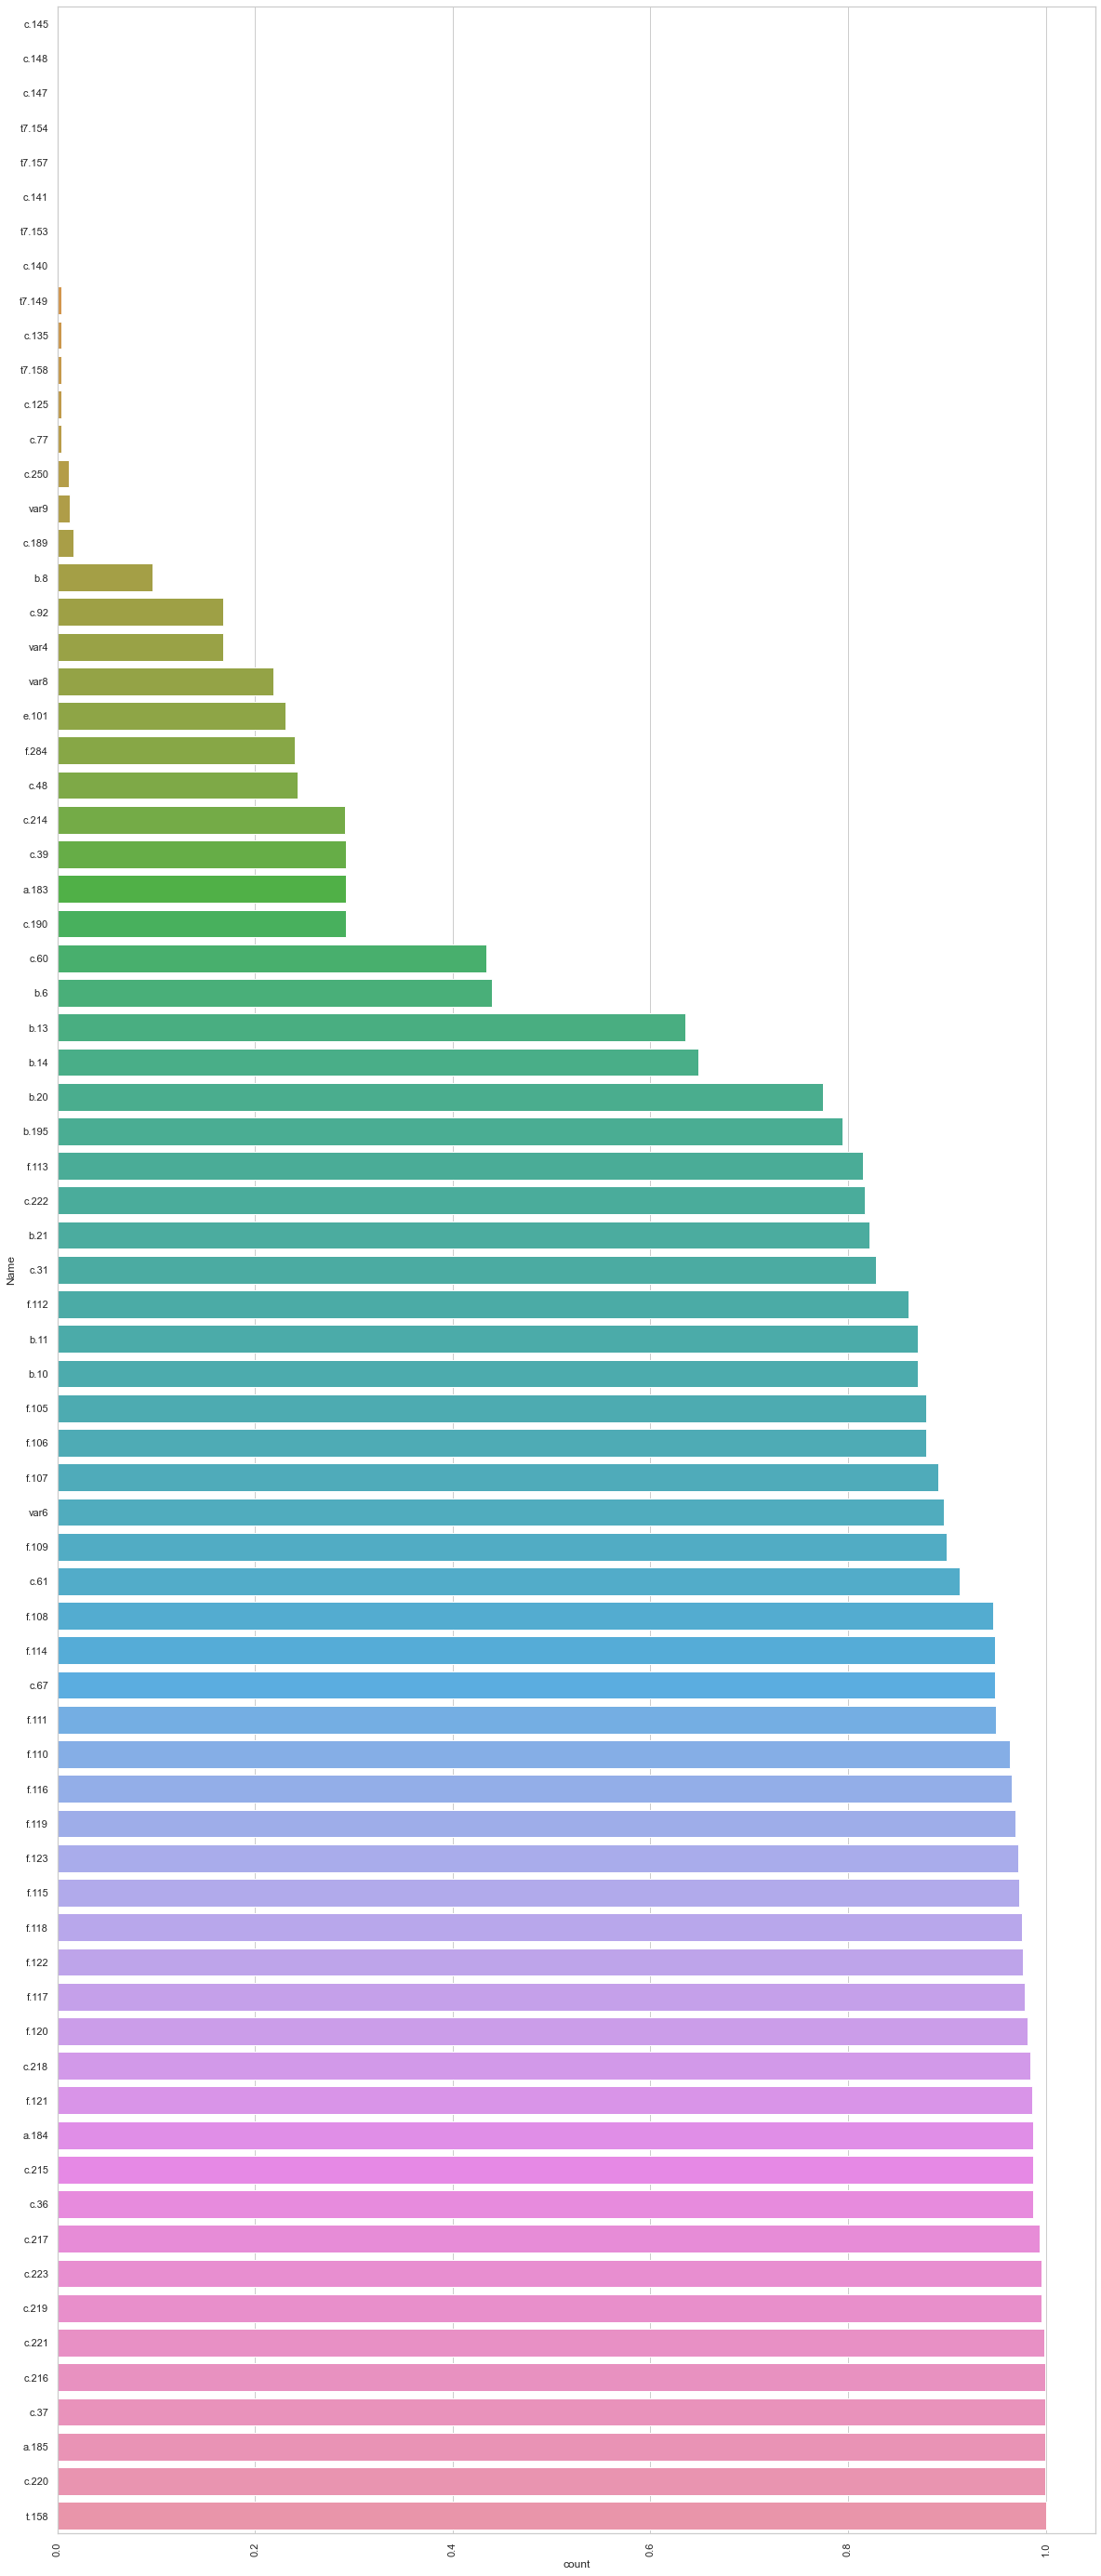

In [52]:
#Visualizing mising values in data set

missing_values = data.isnull().sum() / len(data)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values = pd.DataFrame(missing_values)

missing_values.columns = ['count']
missing_values.index.names = ['Name']
missing_values['Name'] = missing_values.index

fig,ax = plt.subplots(figsize=(20,50))
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'count', y = 'Name', data= missing_values,ax=ax)
plt.xticks(rotation = 90)
plt.show()

In [53]:
x = test_data.drop(['respondent.id','Unnamed: 0','year','totshopping.rep'],axis=1)

In [54]:
data_missing = x[x.columns[x.isnull().any()]]

data_missing

x = x.dropna(axis=1)

data_missing.isnull().sum()

var8      4009
var6     16480
b.6       8079
b.8       1773
b.10     16007
         ...  
c.222    15012
c.223    18292
c.250      221
f.284     4418
t.158    18379
Length: 73, dtype: int64

In [55]:
new_data = data_missing.dropna(thresh=data_missing.shape[0]*0.5,how='all',axis=1)

In [56]:
list((new_data.select_dtypes('object').columns))

['var9']

In [57]:
new_data["var9"].fillna(new_data["var9"].mode(),inplace=True)

D:\Programfiles\anaconda3\envs\tf_gpu\lib\site-packages\pandas\core\series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [61]:
new_data.fillna(new_data.median(),inplace=True)

In [62]:
x_data = pd.concat([x,new_data],axis=1)

In [63]:
x_data.shape

(18379, 253)

In [64]:

dummies = pd.get_dummies(x_data["var9"],columns="categorical_fields",prefix="var9",drop_first=True)

x_data = pd.concat([x_data,dummies],axis=1)

x_data=x_data.drop(["var9"],axis=1)

In [65]:
x_data=x_data[selected_feat]

In [66]:
x_data.shape

(18379, 111)

In [68]:
x_data.head(5)

,month,a.2,a.4,var5,b.5,b.7,b.9,b.12,b.15,b.16,b.17,b.18,b.19,b.22,b.23,b.24,c.29,c.30,var7,c.33,c.38,c.47,c.50,c.52,c.57,c.58,c.59,c.65,c.66,c.69,c.73,c.75,c.76,c.78,c.81,c.82,c.83,c.84,c.93,d.94,e.95,e.96,e.97,e.98,e.99,e.100,f.102,f.103,f.104,a.124,var3,pp.128,pp.130,c.146,t7.152,c.159,c.165,t7.173,t7.182,a.186,var2,var1,c.187,f.188,var0,b.191,b.192,b.193,b.194,c.201,c.205,c.225,c.226,c.231,c.234,c.235,c.236,c.237,c.245,c.246,c.255,c.259,c.266,c.267,c.270,c.276,var8,b.6,b.8,c.39,c.48,c.60,c.77,c.92,e.101,var4,c.125,c.135,c.140,c.141,t7.149,t7.153,t7.154,t7.157,t7.158,a.183,c.189,c.190,c.214,f.284,var9_Multi
0,1,5,57,34,1,1,2,2,6,6,6.0,6.0,7,14,0,0,1,1,1,1,2,679.04,0.0,400.0,400.0,50.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,2,6,2,3,2,2,2,2,1,2,3,7.04,6004575.00,482.11,0.0,0.0,0.0,2,1,2,1,26.70,75.0,1,2,3,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,1,1,1,2.0,2.0,1.0,679.04,2.0,2.0,150.0,2.0,2.0,2.0,150.0,0.0,0.0,75.0,0.0,0.0,75.0,0.0,75.0,113.17,1.0,15.0,6.0,5.0,0
1,1,4,57,34,2,1,2,2,50,50,50.0,50.0,12,31,14,0,2,2,2,0,2,0.00,100.0,30.0,130.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5,2,2,2,3,3,2,2,1,10,7.04,6004575.00,0.00,0.0,0.0,0.0,2,2,2,2,26.70,0.0,1,2,1,14,0,1,0,0,1,0,1,1,1,1,0,0,0,0,1,0,0,0,1,1,0,2.0,3.0,1.0,560.00,2.0,1.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,170.97,7.0,81.0,3.0,3.0,0
2,1,5,57,42,2,1,1,1,6,6,6.0,6.0,7,45,31,0,2,2,3,0,2,0.00,0.0,1000.0,1000.0,250.0,250.0,0.0,0.0,0.0,0.0,0.0,0.0,4000.0,0.0,0.0,0.0,0.0,2,7,4,4,4,4,4,4,1,1,2,5.82,1335537.35,0.00,0.0,0.0,0.0,1,2,1,1,74.75,4000.0,1,2,1,14,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,2.0,1.0,1.0,560.00,2.0,1.0,4000.0,1.0,2.0,1.0,4000.0,4000.0,0.0,0.0,4000.0,0.0,0.0,0.0,4000.0,170.97,7.0,81.0,3.0,3.0,1
3,1,6,57,34,2,1,2,2,7,7,7.0,7.0,8,14,31,0,2,2,2,0,2,0.00,100.0,400.0,500.0,500.0,500.0,0.0,0.0,0.0,0.0,0.0,30.0,300.0,0.0,200.0,200.0,150.0,1,5,2,2,1,3,2,2,1,2,1,7.04,6004575.00,0.00,0.0,0.0,50.0,1,1,1,1,26.70,250.0,1,2,1,14,1,0,0,2,1,0,1,1,1,1,1,1,1,1,1,0,0,0,1,1,0,2.0,4.0,1.0,560.00,2.0,4.0,1000.0,4.0,2.0,4.0,1000.0,75.0,50.0,37.5,75.0,50.0,37.5,0.0,250.0,170.97,7.0,81.0,3.0,5.0,0
4,1,8,22,1,1,1,1,1,2,2,2.0,2.0,3,32,0,0,2,2,2,1,1,600.00,0.0,400.0,400.0,150.0,150.0,0.0,0.0,0.0,0.0,0.0,0.0,2000.0,0.0,0.0,0.0,0.0,2,7,2,2,1,1,1,1,1,2,1,3.67,2284165.39,0.00,0.0,0.0,0.0,1,2,1,1,70.75,2000.0,1,2,1,3,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,2.0,2.0,600.00,1.0,2.0,2000.0,1.0,2.0,1.0,2000.0,2000.0,0.0,0.0,2000.0,0.0,0.0,0.0,2000.0,310.18,1.0,30.0,2.0,5.0,1


In [70]:
import pickle
loaded_model = pickle.load(open("model.sav", 'rb'))
result = loaded_model.predict(x_data)

<AxesSubplot:ylabel='classes'>

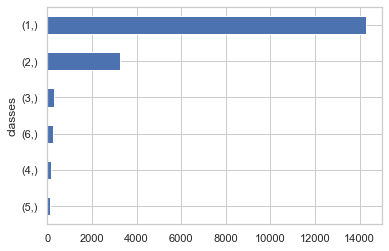

In [89]:
values = pd.DataFrame(result)
values.value_counts().sort_values().plot(kind="barh",xlabel="classes")

In [90]:
values.value_counts()

1    14298
2     3237
3      303
6      252
4      180
5      109
dtype: int64

In [99]:
values.to_csv("Result.csv")

In [102]:
list(result)

[1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 6,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
